See wiki page: https://wiki.cosmos.esa.int/planckpla2015/index.php/Main_Page

Links for masks:
http://irsa.ipac.caltech.edu/data/Planck/release_2/ancillary-data/previews/HFI_Mask_PointSrc_2048_R2.00/header.txt
http://irsa.ipac.caltech.edu/data/Planck/release_2/ancillary-data/previews/HFI_Mask_GalPlane-apo5_2048_R2.00/header.txt

SZ Source Catalog: 
https://wiki.cosmos.esa.int/planckpla2015/index.php/Catalogues#.282015.29_Second_SZ_Catalogue

Format: Healpix format, with Nside of 1024 (LFI 30, 44 and 70) and 2048 (LFI 70 and HFI), in Galactic coordinates, and Nested ordering. 

# Reading a polarization map at 100 GHz

In [2]:
path = "/Users/inchani/Desktop/UC\ Davis/My\ Courses/STA\ 250\ (AstroStatistics)/Project/"; 
map_name = "HFI_SkyMap_100_2048_R2.02_full.fits"; # Polarization map at 100 GHz
using PyCall, PyPlot
@pyimport healpy as hp
dθ = dϕ = 0.0007669903939429012;  # 5 arcmin of resolution to radian
NSIDE = 2048;
Nested = false;

In [3]:
I_STOKES = hp.read_map("$path$map_name", field = 0, memmap = true);
dim = length(I_STOKES)

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


/Users/inchani/.local/lib/python2.7/site-packages/healpy/fitsfunc.py:335: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  "assume {}".format(schm))


50331648

In [ ]:
Q_STOKES = hp.read_map("$path$map_name", field = 1, memmap = true);
U_STOKES = hp.read_map("$path$map_name", field = 2, memmap = true);

Each fits file contains:

Field 0  = I_STOKES, the intensity in each specific band 
Field 1  = Q_STOKES, the polarized brightness 
Field 2  = U_STOKES,        
Field 3  = HITS    , the number of observations 
Field 4  = II_COV  , the variance in the corresponding Stokes parameter 
Field 5  = IQ_COV          
Field 6  = IU_COV  , the covariance inbetween the corresponding Stokes parameter  
Field 7  = QQ_COV  
Field 8  = QU_COV  
Field 9  = UU_COV 

# Also read mask maps
In a galactic mask map, I ruled out " mask value = 0" pixels in 70% coverage case

In [3]:
GalMapFile = "HFI_Mask_GalPlane-apo5_2048_R2.00.fits"
PtMapFile  = "HFI_Mask_PointSrc_2048_R2.00.fits"
GalMap     = hp.read_map("$path$GalMapFile", field = 3, memmap = true); # 70% sky coverage 
PtMap      = hp.read_map("$path$PtMapFile", field = 0, memmap = true);  

NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


(Ordering converted to RING)

# Intensity of all-sky map before masking

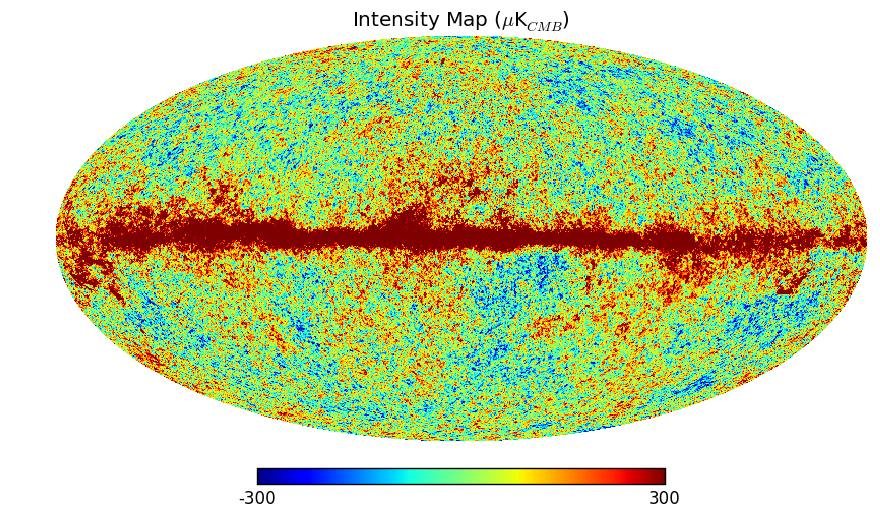

In [6]:
hp.mollview(I_STOKES*1e6, xsize = 800, title = "Intensity Map (\$\\mu\$\K\$\_{CMB}\$\)", min = -300, max = 300)

masking galactic foregrounds and point sources

In [5]:
planck_map = copy(I_STOKES)
cnt = 0
for i = 1:length(GalMap)
    if (GalMap[i] == 0.) | (PtMap[i] == 0.)
        planck_map[i] = hp.UNSEEN
        cnt += 1
    end
end

# Intensity of all-sky map after masking

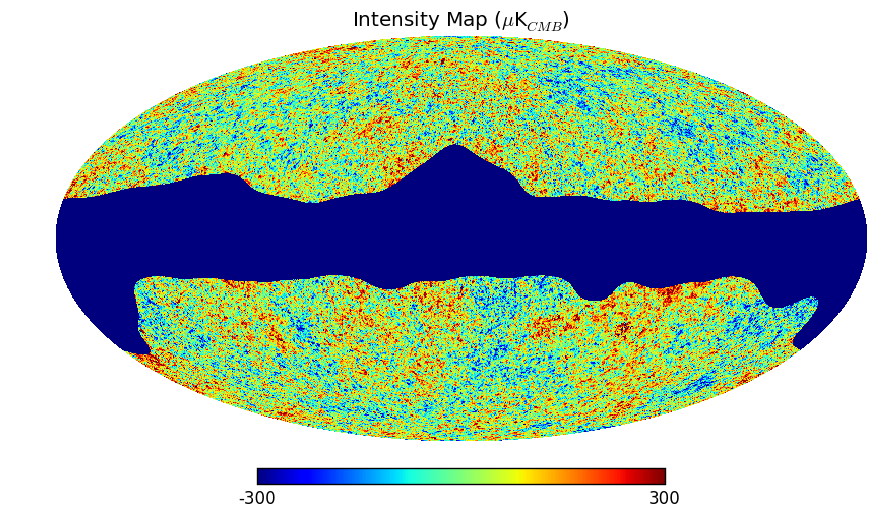

In [6]:
hp.mollview(planck_map*1e6, xsize = 800, title = "Intensity Map (\$\\mu\$\K\$\_{CMB}\$\)", min = -300, max = 300)

# Loading SZ source (Cluster Source)

hdulist = hdulist[Table Type][obj index]

TTYPE1  = 'INDEX   '                                                            
TFORM1  = 'I       '                                                            
TUNIT1  = 'None    '                                                            
TTYPE2  = 'NAME    '                                                            
TFORM2  = '18A     '                                                            
TUNIT2  = 'None    '                                                            
TTYPE3  = 'GLON    '                                                            
TFORM3  = 'D       '                                                            
TUNIT3  = 'degrees '                                                            
TTYPE4  = 'GLAT    ' 
TFORM4  = 'D       '                                                            
TUNIT4  = 'degrees '
TTYPE19 = 'REDSHIFT'                                                            
TFORM19 = 'E       '                                                            
TUNIT19 = 'None    ' 
TTYPE20 = 'MSZ     ' 
TFORM20 = 'E       '                                                            
TUNIT20 = '10^14 Msol' 


(Index starts with 1)

@pyimport healpy.pixelfunc as pixelfunc
ind = 0
l,b     = pixelfunc.pix2ang(2048,ind,nest=false)   # pixel index > Spherical Coord, [θ, ϕ] [radian unit]
ind_rtn = pixelfunc.ang2pix(2048,l,b,nest=false)   # Spherical Coord, [θ, ϕ]> pixel index
Note: ϕ = 0 (θ=90 deg) is toward galactic center > need to convert coordinates of SZ sources
      increasing ϕ = moving East, increasing θ = moving South

In [4]:
SZsource = "HFI_PCCS_SZ-union_R2.08.fits"
@pyimport healpy.fitsfunc as fitsfunc
@pyimport healpy.pixelfunc as pixelfunc
hdulist = fitsfunc.mrdfits("$path$SZsource",hdu=1);   #  load HDU table #1
ind = sortperm(hdulist[20][:],rev=true);              #  return indices of ojects in decreasing order of total mass

1653-element Array{Int64,1}:
   23
 1341
 1232
  931
  307
  837
 1627
 1322
 1526
  862
  807
  758
 1412
    ⋮
 1608
 1611
 1621
 1626
 1628
 1633
 1636
 1640
 1643
 1648
 1652
 1653

In [100]:
function SpheCoord2Index(θmin::Float64,θmax::Float64,ϕmin::Float64,ϕmax::Float64)
    index = Array(Int64,0)
    θ = θmax;
    Nϕpix = pixelfunc.ang2pix(NSIDE,θmax,ϕmax)- pixelfunc.ang2pix(NSIDE,θmax,ϕmin)
    #if Nϕpix < 0
    #    dummy = copy(ϕmin)
    #    ϕmin  = copy(ϕmax)
    #    ϕmax  = copy(dummy) 
    #    Nϕpix *= -1
    #end
    #Nϕpix = NSIDE
    #println("Nϕpix = $Nϕpix")
    if Nϕpix < 0
        return 0,0, index
    end
    Nθpix = 0
    while θ > θmin
        ϕ = ϕmin;
        ist = pixelfunc.ang2pix(NSIDE,θ,ϕ)
        ind = Int64[i for i=ist:ist+Nϕpix-1]             # Pixels at θ
        index = vcat(index,ind)
        ist = pixelfunc.get_all_neighbours(NSIDE,θ,ϕ)[3] # Again Pixels on North West to fully cover area.
        ind = Int64[i for i=ist:ist+Nϕpix-1]
        index = vcat(index,ind)        
        #(SW, W, NW, N, NE, E, SE and S )
        i = pixelfunc.get_all_neighbours(NSIDE,θ,ϕ)[4]
        θ, b = pixelfunc.pix2ang(NSIDE,i) 
        Nθpix += 2
    end
#   Nϕpix = pixelfunc.ang2pix(NSIDE,θ,ϕmax)- pixelfunc.ang2pix(NSIDE,θ,ϕmin)
#   println("Nϕpix = $Nϕpix")
    return Nϕpix, Nθpix, index
end

SpheCoord2Index (generic function with 1 method)

In [ ]:
#dtheta = 15. / 360 * 2pi; # 15 degrees in radian
#Nϕ, Nθ, index = SpheCoord2Index(0.3pi,0.3pi+dtheta,50dϕ,50dϕ+dtheta);
#planck_map = copy(I_STOKES)
#cnt = 0
#for i = 1:length(index)
#    planck_map[index[i]] = hp.UNSEEN
#end
#hp.mollview(planck_map*1e6, xsize = 800, title = "Intensity Map (\$\\mu\$\K\$\_{CMB}\$\)", min = -300, max = 300)

In [48]:
CoordSCluster = Array(Float64, length(ind), 2) # Center of Clusters in [θ, ϕ] in radian
for i = 1:length(ind)
    CoordSCluster[i,1] = pi*0.5 - hdulist[4][ind[i]]* pi / 180
    CoordSCluster[i,2] = hdulist[3][ind[i]] * pi / 180
end

In [107]:
planck_map = copy(I_STOKES)

50331648-element Array{Float64,1}:
 -0.000122385
 -9.95854e-5 
 -3.97362e-5 
 -8.64177e-5 
 -6.31121e-5 
 -0.000117532
 -0.000119711
 -5.01412e-5 
 -6.03818e-5 
 -1.62597e-5 
 -0.000137699
 -0.000110545
 -0.000100209
  ⋮          
  7.91862e-5 
  1.71163e-7 
  7.46492e-5 
  0.000135327
  0.00015983 
  0.000133309
  5.96356e-5 
  4.71951e-5 
  0.000129426
  0.000111708
  5.10435e-5 
 -2.07038e-6 

In [111]:
for i = 15:20
    l, b = CoordSCluster[i,:]
    
    Nϕ, Nθ, index = SpheCoord2Index(CoordSCluster[i,1]-dtheta*0.5,CoordSCluster[i,1]+dtheta*0.5,
    CoordSCluster[i,2]-dtheta*0.5,CoordSCluster[i,2]+dtheta*0.5)
    println("$l, $b, $Nϕ, $Nθ")    
    planck_map[index] = hp.UNSEEN
 
end

1.3922393184332382, 3.6615801368607, 341, 790
2.2804886948726577, 3.0016913702151946, 298, 626
2.3622987598384775, 0.9992737176278169, 266, 614
0.2582091298772802, 3.9821554426157504, 161, 652
1.9121151475090052, 0.07770172223965102, 0, 0
1.9236916303634644, 5.381518363952638, 341, 754


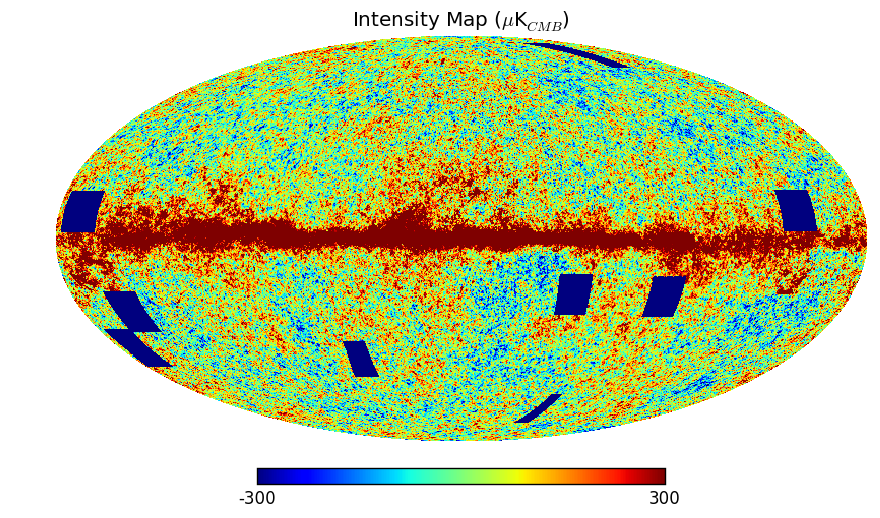

In [112]:
hp.mollview(planck_map*1e6, xsize = 800, title = "Intensity Map (\$\\mu\$\K\$\_{CMB}\$\)", min = -300, max = 300)